## Sales Prediction with BigMart dataset

### Steps:

* Importing the dependencies
* Data collection and cleaning
* EDA
* Data preprocessing
* Training the model
* Evaluating the model

#### Step 1 - Importing the dependencies

##### Here we will be importing the modules we will be using for the analysis and prediction, such as numpy, pandas, seaborn, sklearn etc

In [293]:
# numpy is a python library used for working with arrays
import numpy as np

# pandas, a library built on numpy is used for data analysis
import pandas as pd

# matplotlib is a library used for visualising data as plots and graphs
from matplotlib import pyplot as plt

# seaborn is also used for visualization
import seaborn as sns

# to transform the categorical data into numerical
from sklearn.preprocessing import LabelEncoder

# train_test_split is used for splitting the data as training and testing
from sklearn.model_selection import train_test_split

# training the model with regressors
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

# metrics is used to give us metrics on the models
from sklearn import metrics

#### Step 2 - Data collection and cleaning

##### Here we will be loading the data, understanding the data and handling missing values if any

In [294]:
# loading the dataset as a pandas dataframe
big_mart_data = pd.read_csv('Train.csv')
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [295]:
# understanding the shape which showed us that there are 12 features and 8523 data rows
big_mart_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [296]:
# getting the physical information of the data (null values, data types, columns etc)
big_mart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [297]:
# understanding the features
# the first feature is Item_Identifier which is a categorical feature refers to the unique identification (id) of the item,
II_unique = big_mart_data['Item_Identifier'].value_counts()
II_mode = big_mart_data['Item_Identifier'].mode()[0]
print('The unique values are {0}, The value with the highest occurence is {1}'.format(II_unique, II_mode))
# it has infinite number of unique values and no missing values
# there are no missing values in this feature

The unique values are FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64, The value with the highest occurence is FDG33


In [298]:
# another feature is item_weight which is a numerical feature refers to the weight of the item,
IW_min = big_mart_data['Item_Weight'].min()
IW_max = big_mart_data['Item_Weight'].max()
IW_mean = big_mart_data['Item_Weight'].mean()
print('min = {0}, max = {1}, mean = {2}' .format(IW_min, IW_max, IW_mean))
# which has an average weight of 12.86 and has some missing values which we'll hadle later. 

min = 4.555, max = 21.35, mean = 12.857645184135976


In [299]:
# Item_Fat_Content, a categorical feature is the fat level of the item
IFC_unique = big_mart_data['Item_Fat_Content'].value_counts()
IFC_mode = big_mart_data['Item_Fat_Content'].mode()[0]
print('The unique values are {0}, and the highest occuring value is {1}'.format(IFC_unique, IFC_mode))
# there are 5 unique values of which some are repetitions, Low Fat, LF and low fat means the same thing. Regular and reg are as well the same.
# we will handle this later on
# there are no missing values in this feature

The unique values are Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64, and the highest occuring value is Low Fat


In [300]:
# Item_Visibility, a numerical feature which refers to the ability of shoppers to see the item
IV_mean = big_mart_data['Item_Visibility'].mean()
IV_max = big_mart_data['Item_Visibility'].max()
IV_min = big_mart_data['Item_Visibility'].min()
print('The mean value of Item Visibility is {0}, the minimum is {1} and the maximum is {2}'.format(IV_mean, IV_min, IV_max))
# there are no missing values

The mean value of Item Visibility is 0.06613202877895108, the minimum is 0.0 and the maximum is 0.328390948


In [301]:
# Item_Type, a categorical feature refers to the category of the item 
IT_unique = big_mart_data['Item_Type'].value_counts()
IT_mode = big_mart_data['Item_Type'].mode()[0]
print('The unique values are {0}, and the highest occuring value is {1}' .format(IT_unique, IT_mode))
# there are 16 unique values
# there are no missing values in this feature

The unique values are Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64, and the highest occuring value is Fruits and Vegetables


In [302]:
# Item_MRP (Material Requirements Planning) , a numerical feature is the estimates of the quantities of materials that will be required to meet the production schedule.
IMRP_mean = big_mart_data['Item_MRP'].mean()
IMRP_max = big_mart_data['Item_MRP'].max()
IMRP_min = big_mart_data['Item_MRP'].min()
print('The mean value of Item_MRP is {0}, the minimum is {1} and the maximum is {2}'.format(IMRP_mean, IMRP_min, IMRP_max))
# there are no missing values

The mean value of Item_MRP is 140.9927819781767, the minimum is 31.29 and the maximum is 266.8884


In [303]:
# Outlet_Identifier, a categorical feature is the identification (id) of the sales (customer)
OI_unique = big_mart_data['Outlet_Identifier'].value_counts()
OI_mode = big_mart_data['Outlet_Identifier'].mode()[0]
print('The unique values are {0}, and the highest occuring value is {1}'.format(OI_unique, OI_mode))
# there are 10 unique values
# there are no missing values in this feature

The unique values are OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64, and the highest occuring value is OUT027


In [304]:
# Outlet_Establishment_Year, a numerical feature oa the year a particular item was sold to that particular customer
OEY_mean = big_mart_data['Outlet_Establishment_Year'].mean()
OEY_max = big_mart_data['Outlet_Establishment_Year'].max()
OEY_min = big_mart_data['Outlet_Establishment_Year'].min()
print('The mean value of Outlet_Establishment_Year is {0}, the minimum is {1} and the maximum is {2}'.format(OEY_mean, OEY_min, OEY_max))
# there are no missing values

The mean value of Outlet_Establishment_Year is 1997.8318667135984, the minimum is 1985 and the maximum is 2009


In [305]:
# Outlet_Size, a categorical feature is the class of the size of the item sold
OS_unique = big_mart_data['Outlet_Size'].value_counts()
OS_mode = big_mart_data['Outlet_Size'].mode()[0]
print('The unique values are {0}, and the highest occuring value is {1}'.format(OS_unique, OS_mode))
# there are 3 unique values
# there are missing values which we will handle later 

The unique values are Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64, and the highest occuring value is Medium


In [306]:
# Outlet_Location_Type, a categorical feature is the class of the location of the customers from nearest to farthest
OLT_unique = big_mart_data['Outlet_Location_Type'].value_counts()
OLT_mode = big_mart_data['Outlet_Location_Type'].mode()[0]
print('The unique values are {0}, and the highest occuring value is {1}'.format(OLT_unique, OLT_mode))
# there are 3 unique values and no missing values

The unique values are Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64, and the highest occuring value is Tier 3


In [307]:
# Outlet_Type, a categorical feature is the type of venture of the customer
OT_unique = big_mart_data['Outlet_Type'].value_counts()
OT_mode = big_mart_data['Outlet_Type'].mode()[0]
print('The unique values are {0}, and the highest occuring value is {1}'.format(OT_unique, OT_mode))
# there are 3 unique values and no missing values

The unique values are Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64, and the highest occuring value is Supermarket Type1


In [308]:
# Item_Outlet_Sales, a numerical feature is the amount of the item sold
IOS_mean = big_mart_data['Item_Outlet_Sales'].mean()
IOS_max = big_mart_data['Item_Outlet_Sales'].max()
IOS_min = big_mart_data['Item_Outlet_Sales'].min()
print('The mean value of Item_Outlet_Sales is {0}, the minimum is {1} and the maximum is {2}'.format(IOS_mean, IOS_min, IOS_max))
# there are no missing values

The mean value of Item_Outlet_Sales is 2181.288913575032, the minimum is 33.29 and the maximum is 13086.9648


In [309]:
# notice the missing values in Item_Weight and Item_Size
# so we need to handle them
# how we'll handle this is quite different; we'll be using a related feature to decide the missing values

In [310]:
# for Item Weight
# the related feature we'll be using is Item_Type
# this is a numerical feature so we'll be using the mean value to fill the null values
#Item_Weight_Type_Mean = big_mart_data.pivot_table(values='Item_Weight', columns='Item_Type', aggfunc=(lambda x:x.mean()))
#Item_Weight_Type_Mean

In [311]:
#Missing_Weight = big_mart_data['Item_Weight'].isnull()
#big_mart_data.loc[Missing_Weight, 'Item_Weight'] = big_mart_data.loc[Missing_Weight, 'Item_Type'].apply(lambda x:Item_Weight_Type_Mean)

big_mart_data['Item_Weight'].fillna(big_mart_data['Item_Weight'].mean(), inplace=True)

In [312]:
big_mart_data['Item_Weight'].isnull().sum()

0

In [313]:
# for Outlet_Size
# the related feature we'll be using is Outlet_Type
# this is a categorical feature so we'll be using the highest occuring value
Outlet_Size_Type_Mode = big_mart_data.pivot_table(values='Outlet_Size', index='Outlet_Type', aggfunc=(lambda x:x.mode()[0]))
print(Outlet_Size_Type_Mode)

                  Outlet_Size
Outlet_Type                  
Grocery Store           Small
Supermarket Type1       Small
Supermarket Type2      Medium
Supermarket Type3      Medium


In [314]:
Missing_Size = big_mart_data.Outlet_Size.isnull()
big_mart_data.loc[Missing_Size, 'Outlet_Size'] = big_mart_data.loc[Missing_Size, 'Outlet_Type'].apply(lambda x:Outlet_Size_Type_Mode.loc[x])

In [315]:
big_mart_data['Outlet_Size'].isnull().sum()

0

In [316]:
# we also have a feature which include repetitive values
# this we will also solve
big_mart_data.replace({'Item_Fat_Content':{'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'}}, inplace=True)

In [317]:
big_mart_data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

#### Step 3 - EDA

##### Here we'll be understanding the statistical look of the data as well as visualizing distribution and frequency

In [318]:
# getting statistical information on the numerical  the data (mean, min, max, percentiles, count and standard deviation)
big_mart_data.describe(include=[float,int])

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [319]:
# getting the statistical information on the categorical features of the data
big_mart_data.describe(include=[object])

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,8523,8523,8523
unique,1559,2,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Small,Tier 3,Supermarket Type1
freq,10,5517,1232,935,4798,3350,5577


In [320]:
# we need to drop id variables since we wont be using them
#big_mart_data.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1)

In [321]:
# Visualizing numerical features

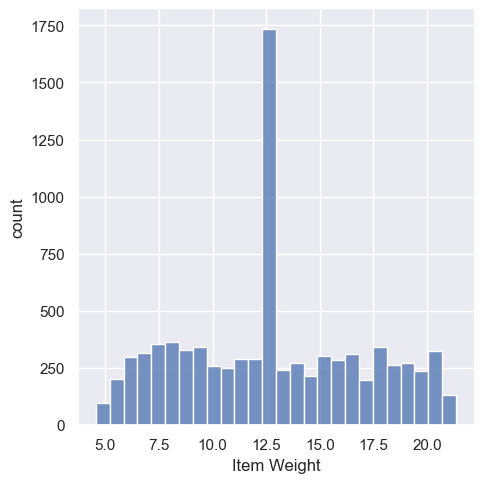

In [322]:
# visualize item weight
sns.set(rc={'figure.figsize':[8,6]})
sns.displot(big_mart_data, x='Item_Weight').set(xlabel='Item Weight', ylabel='count')
plt.show()


Above is a normal distribution with 12.5 being the medium value. There is a bit of bias towards the 12.5 since it is the value we used in filling the missing values, hence, it's also the highest occuring value.

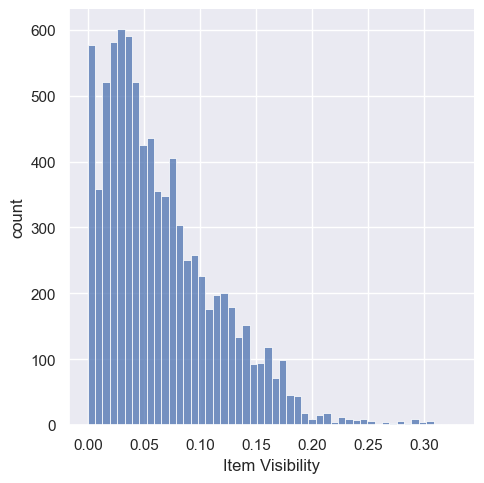

In [323]:
# visualize item visibility
sns.set(rc={'figure.figsize':[8,6]})
sns.displot(big_mart_data, x='Item_Visibility').set(xlabel='Item Visibility', ylabel='count')
plt.show()

The visibility value ranges between 0.0 - 0.3, with 0.15 being the median. The viisbility value of most of the items lie between 0.03 - 0.05. We can also notice that the data is skewed.

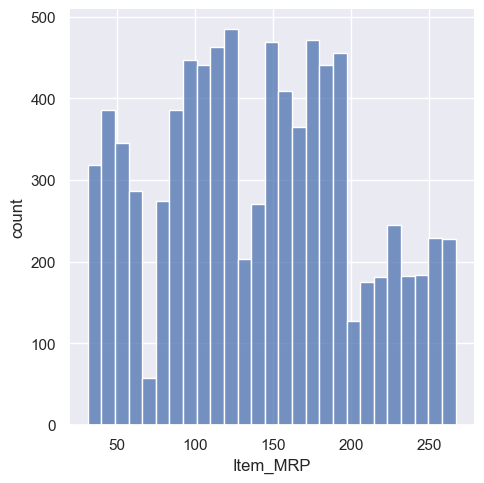

In [324]:
# visualize Item MRP
sns.set(rc={'figure.figsize':[8,6]})
sns.displot(big_mart_data, x='Item_MRP').set(xlabel='Item_MRP', ylabel='count')
plt.show()

We can see different peaks in the graph above. This implies that the data is not a normal distribution

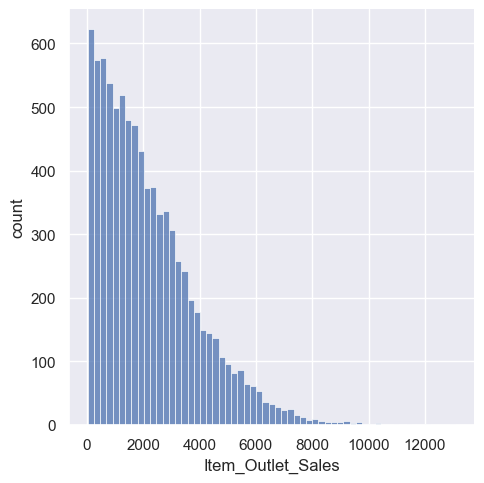

In [325]:
# visualize Item Outlet Sales
sns.set(rc={'figure.figsize':[8,6]})
sns.displot(big_mart_data, x='Item_Outlet_Sales').set(xlabel='Item_Outlet_Sales', ylabel='count')
plt.show()

The data above is also skewed. It ranges from 0 to 12000, with 6000 being the median. The highest occurence is 0 which means that in a number of cases, the sales lie between 0-1000. Earlier information gave us that the lowest sale is 33 so most of the time, products sold are usually 33-1000

In [326]:
# Visualising Categorical data

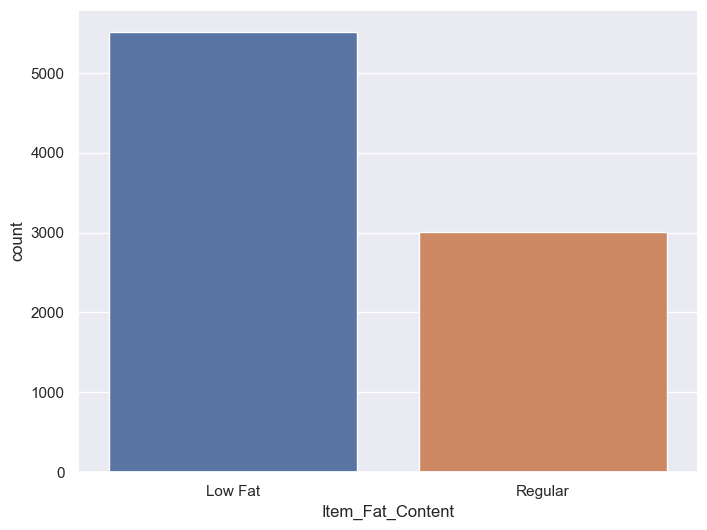

In [327]:
# visualize Item_Fat_Content
sns.set(rc={'figure.figsize':[8,6]})
sns.countplot(data=big_mart_data, x='Item_Fat_Content').set(xlabel='Item_Fat_Content', ylabel='count')
plt.show()

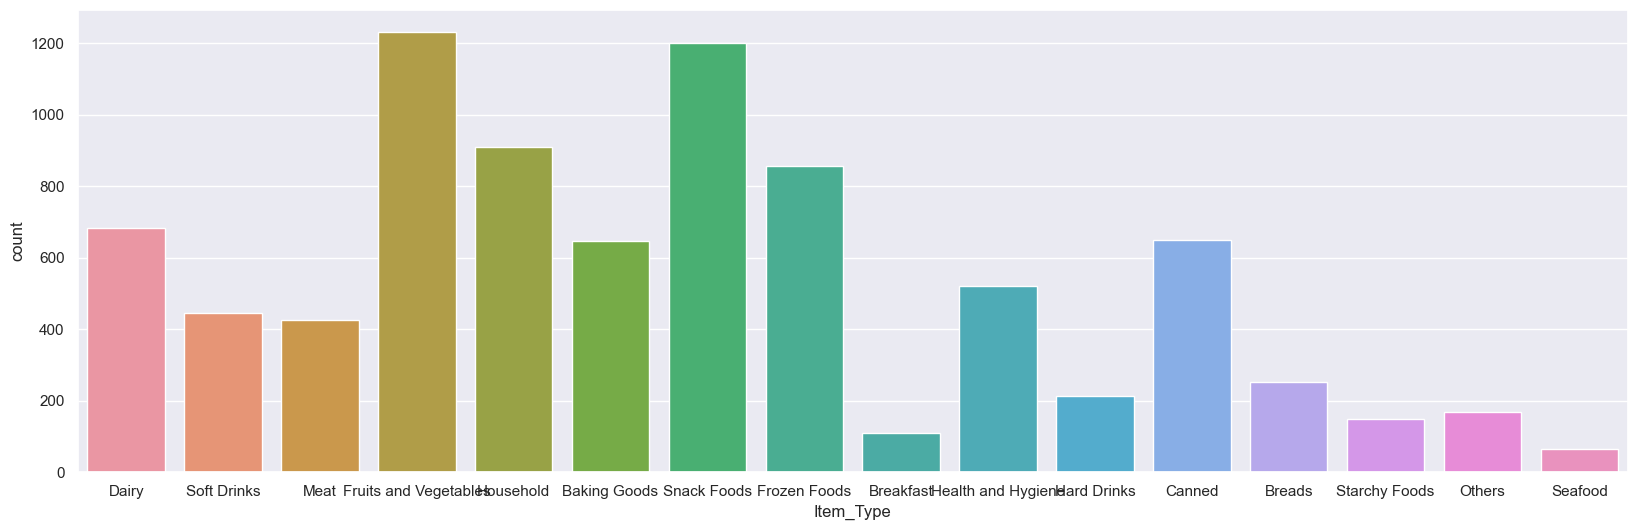

In [328]:
# visualize Item_Type
sns.set(rc={'figure.figsize':[20,6]})
sns.countplot(data=big_mart_data, x='Item_Type').set(xlabel='Item_Type', ylabel='count')
plt.show()

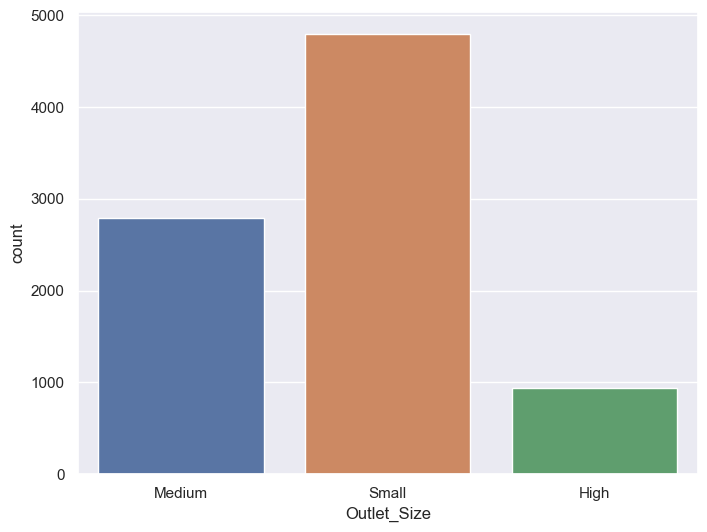

In [329]:
# visualize Outlet_Size
big_mart_data['Outlet_Size'] = big_mart_data['Outlet_Size'].astype(str)
sns.set(rc={'figure.figsize':[8,6]})
sns.countplot(data=big_mart_data, x='Outlet_Size').set(xlabel='Outlet_Size', ylabel='count')
plt.show()

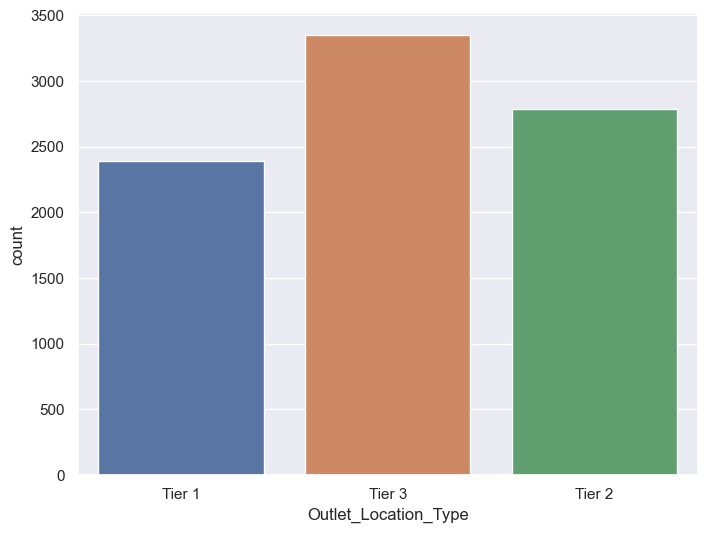

In [330]:
# visualize Outlet_Location_Type
sns.set(rc={'figure.figsize':[8,6]})
sns.countplot(data=big_mart_data, x='Outlet_Location_Type').set(xlabel='Outlet_Location_Type', ylabel='count')
plt.show()

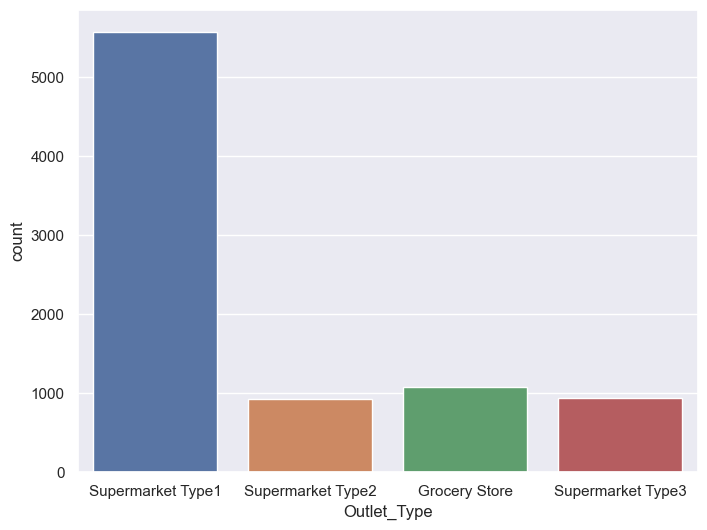

In [331]:
# visualize Outlet_Type
sns.set(rc={'figure.figsize':[8,6]})
sns.countplot(data=big_mart_data, x='Outlet_Type').set(xlabel='Outlet_Type', ylabel='count')
plt.show()

C:\Users\Xty Ayodele\AppData\Local\Temp\ipykernel_368\3835561626.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(big_mart_data.corr())


<AxesSubplot: >

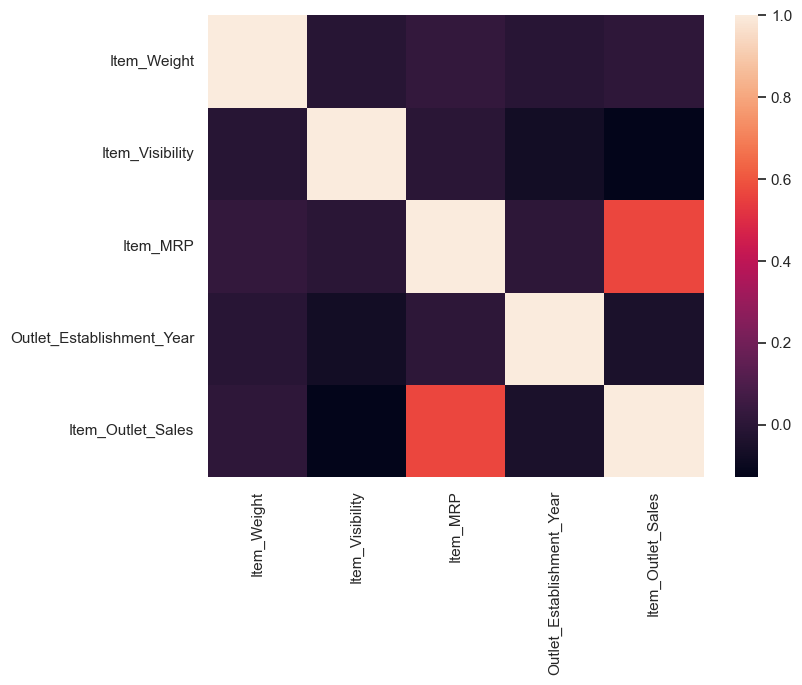

In [332]:
sns.heatmap(big_mart_data.corr())
#big_mart_data.corr()

We can visualize the features that are strongly correlated with our target variable. They are Item_Weight, Item_type, Item_Fat_Content, Outlet_Establishment_Year, Outlet_Location_Type

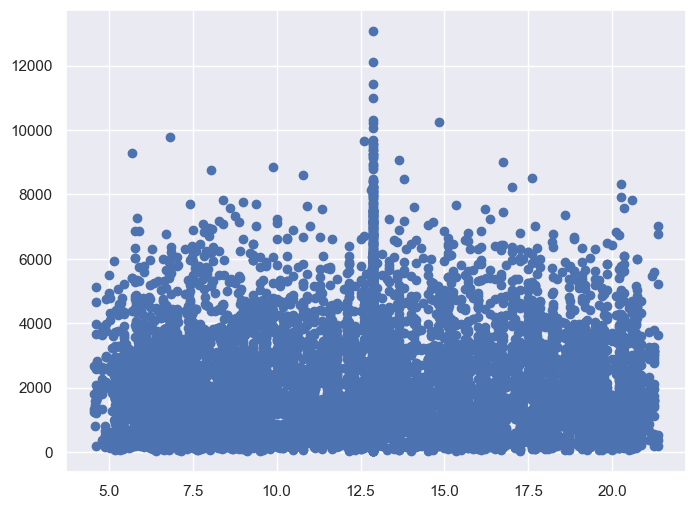

In [333]:
plt.scatter(big_mart_data['Item_Weight'], big_mart_data['Item_Outlet_Sales'])
plt.x_label='Item_Weight'
plt.y_label='Item_Outlet_Sales'
plt.show()

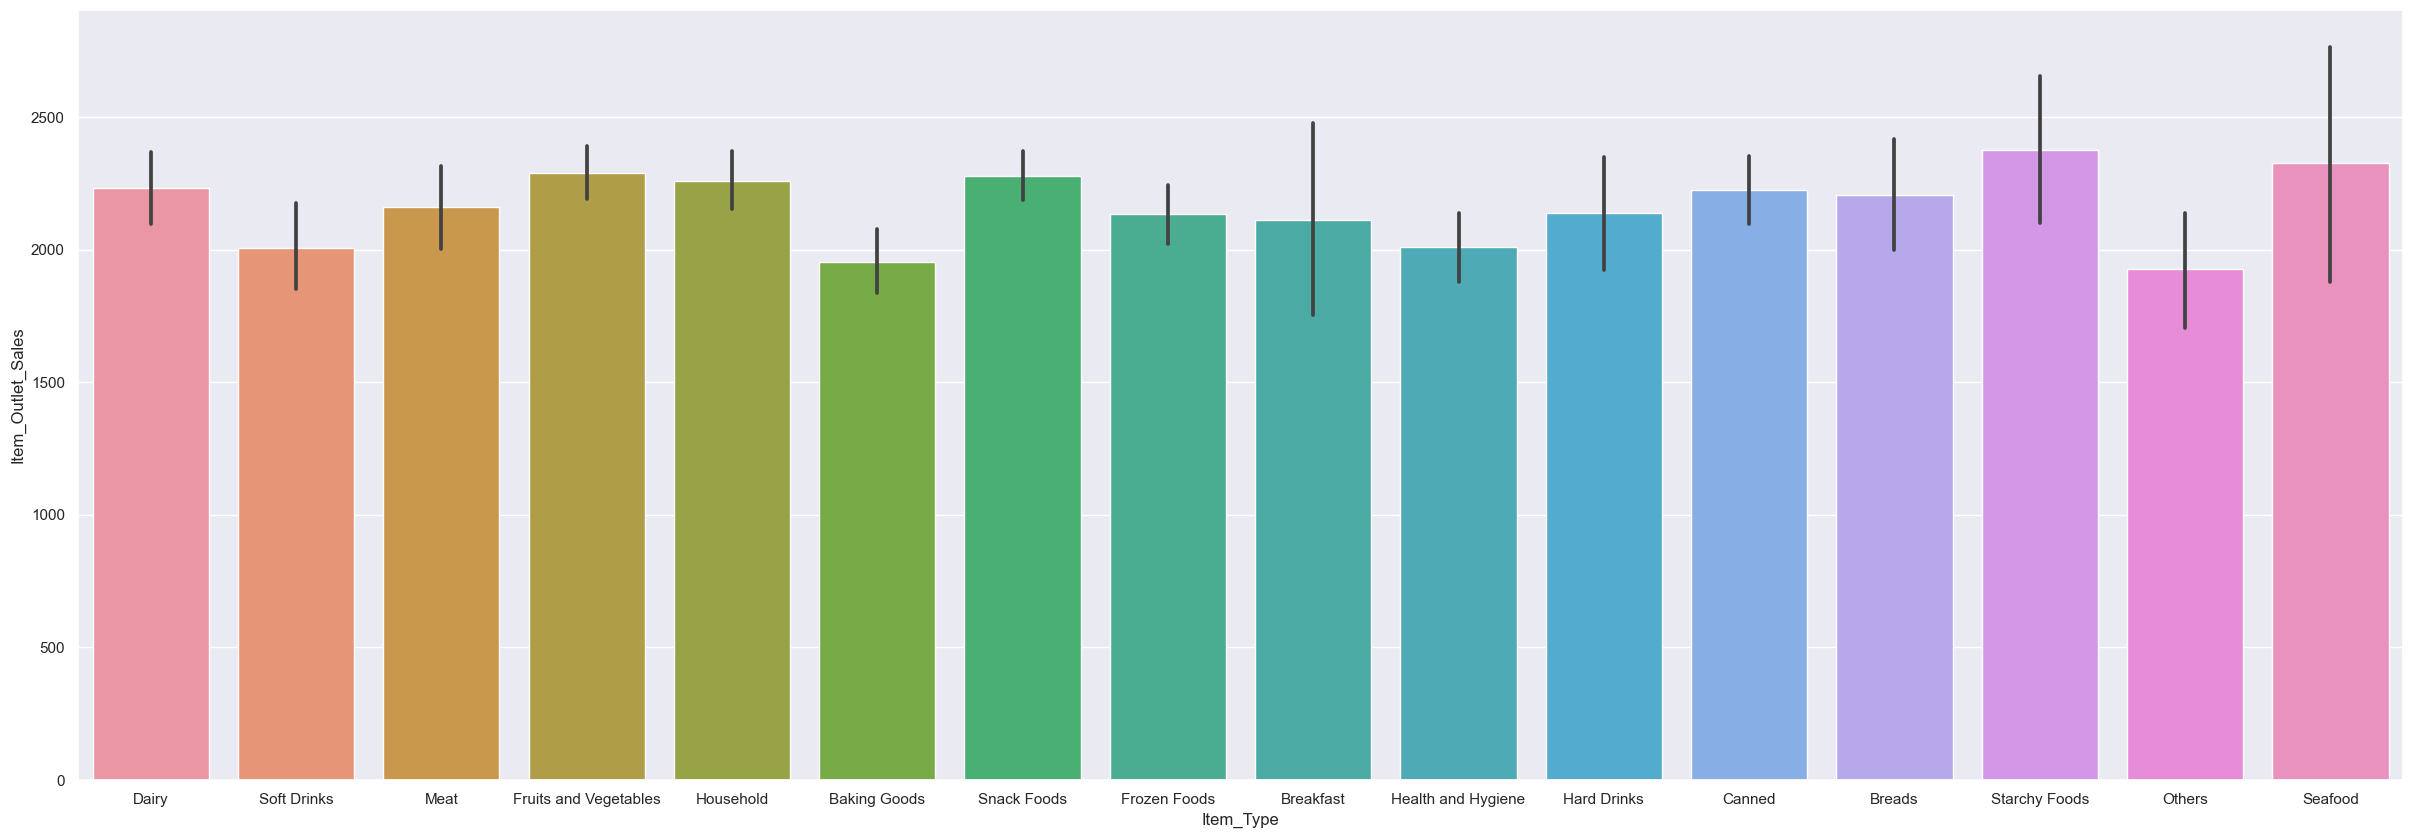

In [334]:
plt.figure(figsize=(30,10))
sns.barplot(data=big_mart_data, x='Item_Type', y='Item_Outlet_Sales')
plt.show()

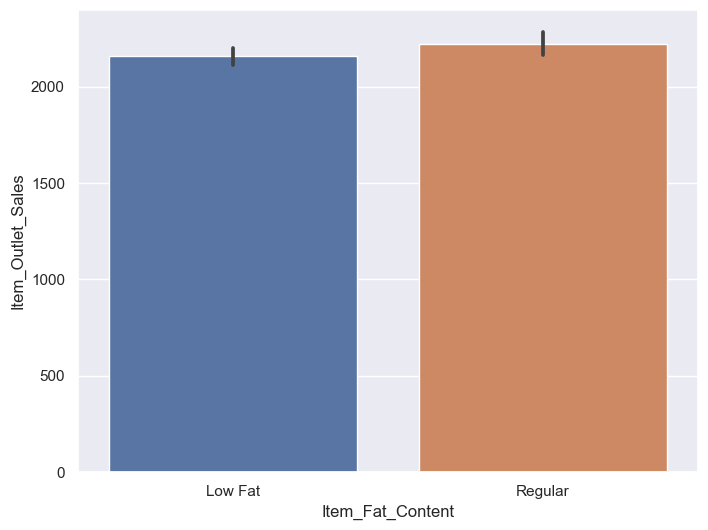

In [335]:
sns.barplot(data=big_mart_data, x='Item_Fat_Content', y='Item_Outlet_Sales')
plt.show()

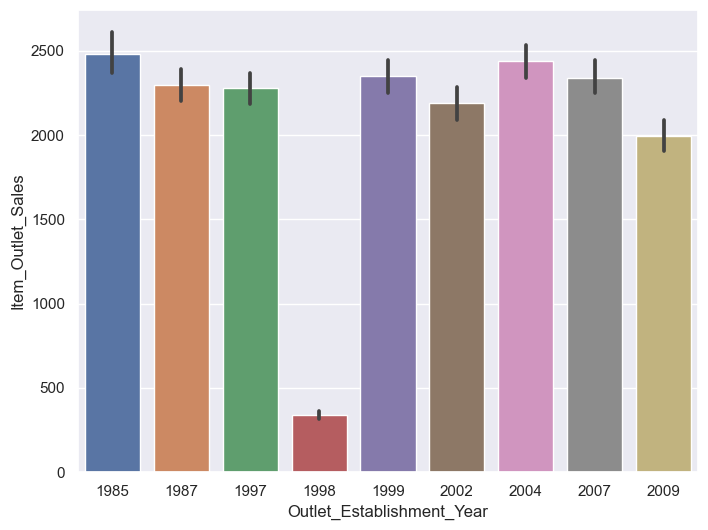

In [336]:
sns.barplot(data=big_mart_data, x='Outlet_Establishment_Year', y='Item_Outlet_Sales')
plt.show()

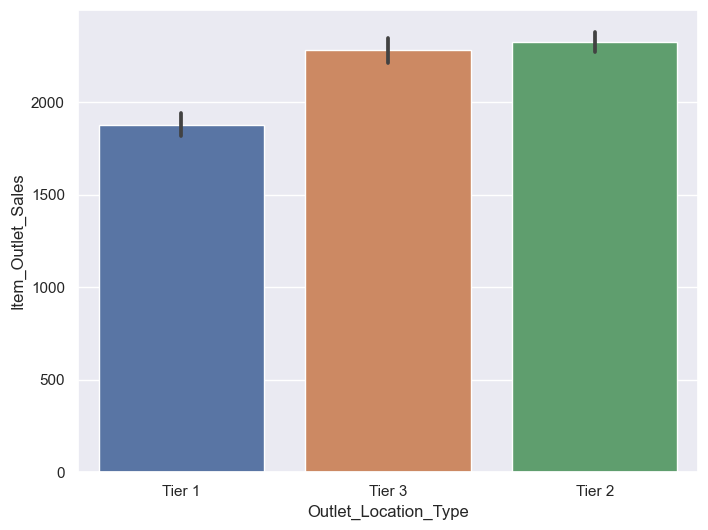

In [337]:
sns.barplot(data=big_mart_data, x='Outlet_Location_Type', y='Item_Outlet_Sales')
plt.show()

From the related visualizations above:
- Products whose weight are 12.5 tend to have high sales
- Starchy food and Seafood sold the most
- Regular Fat content sold the most
- The best sale was in 1985, Business was very bad in 1998
- Location type Tier 2 buys a lot

#### Step 4 - Categorical data Transformation

##### Here we will transform the categorical data into numerical using label encoder

In [338]:
# instantiating the label encoder
labelencoder = LabelEncoder()

In [339]:
labels = ['Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Fat_Content']
for i in labels:
    big_mart_data[i] = labelencoder.fit_transform(big_mart_data[i])

In [340]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0,0.016047,4,249.8092,OUT049,1999,1,0,1,3735.1380
1,DRC01,5.92,1,0.019278,14,48.2692,OUT018,2009,1,2,2,443.4228
2,FDN15,17.50,0,0.016760,10,141.6180,OUT049,1999,1,0,1,2097.2700
3,FDX07,19.20,1,0.000000,6,182.0950,OUT010,1998,2,2,0,732.3800
4,NCD19,8.93,0,0.000000,9,53.8614,OUT013,1987,0,2,1,994.7052


In [341]:
# lets drop the columns that are not needed
big_mart_data = big_mart_data.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1)

In [342]:
# splitting the data into train and test
x = big_mart_data.drop(columns='Item_Outlet_Sales', axis=1)
Y = big_mart_data['Item_Outlet_Sales']

x_train, x_test, Y_train, Y_test = train_test_split(x,Y, test_size=0.2, random_state=2)

Building the DecisionTreeRegressor Model - DecTree

In [343]:
# instantiate the Decision Tree Regressor algorithm
DecTree = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
# training the model
DecTree.fit(x_train, Y_train)

DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)

In [344]:
# evaluating the DecTree model
DecTree_y_pred = DecTree.predict(x_test)
metrics.r2_score(Y_test,DecTree_y_pred)

0.5732704288038205

Building the LinearRegression Model - LinReg

In [345]:
# instantiate the Linear Regression algorithm
LinReg = LinearRegression()
LinReg.fit(x_train, Y_train)

LinearRegression()

In [346]:
# evaluating the LinReg model
LinReg_y_pred = LinReg.predict(x_test)
metrics.r2_score(Y_test,LinReg_y_pred)

0.4862438042517587